The dataset has been shared by a spotify user. I found it in Kaggle. 

The user has created 2 playlists on Spotify. Both contain around 1000 songs. One with songs, he likes and the other with songs he doesn't like. 

He made sure to vary the styles of music in the 2 playlists. 

Objectif : If, as he indicates, his musical tastes are eclectic, the data set therefore seems interesting for studying the prediction that a song might like him by studying the criteria of the songs.

# Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
%matplotlib inline

# Manipulating Dataset

In [2]:
pwd

'/Users/tatiana/ironhack/Spotify_Pred/main'

In [3]:
url='/Users/tatiana/ironhack/Spotify_Pred/data/data.csv'#1 csv file with all songs

In [4]:
df=pd.read_csv(url)
df.head(15)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


The column "Unamed 0" is an index column. We can drop it.

In [5]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


"Unamed 0" has correctly been drop it.

In [6]:
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


## Shape of dataset

In [7]:
df.shape

(2017, 16)

The dataset is composed with 16 columns and 2017 rows

## List of columns

In [8]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

Each row of those columns descibes a song : 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence',

## Dtype of columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

The following columns are ordinals columns : 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence', 'target'
    

The column song_title and artist won't be usefull to make our prediction. 
Indeed, we study what criteria of music can influence his musical preferences. Whether or not, he's going to like music. We don't want to know in this case if he likes the title of the song or the artist.

In [10]:
df.artist.value_counts()

Drake                 16
Rick Ross             13
Disclosure            12
WALK THE MOON         10
Backstreet Boys       10
                      ..
Roy Ayers Ubiquity     1
Steve Aoki             1
Infant Annihilator     1
Keys N Krates          1
Rob Curly              1
Name: artist, Length: 1343, dtype: int64

## Drop song_title and artist

In [11]:
df.drop(['song_title', 'artist'], axis=1,inplace=True)

In [12]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


## New shape

In [13]:
df.shape

(2017, 14)

## Missing values

In [14]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

There are no missing values

## Repartition of songs, liked and not liked in the dataset

In [15]:
df.target.value_counts()

rows=df.shape[0]
liked =round(1020/rows*100)
notliked=round(997/rows*100)

In [16]:
print(f'In the dataset, the % of songs liked: {liked}\nthe % of songs not liked: {notliked}')

In the dataset, the % of songs liked: 51
the % of songs not liked: 49


The dataset is well balanced between songs liked and not liked.

In [17]:
df.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

## describe

In [18]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


The values in duration _ms are between 10^4 and 10^6 so it may be better to transform in minutes.
The min and 1rst quartile is 0 for instrumentalness column and mode column is 0. 
It happens for instrumentalness when the song is vocals like in rap. So it is not an issue.
In mode columns we have the modality, major is 1 and minor is 0. So once again, it's not an issue.

# Visualization

## Correlation

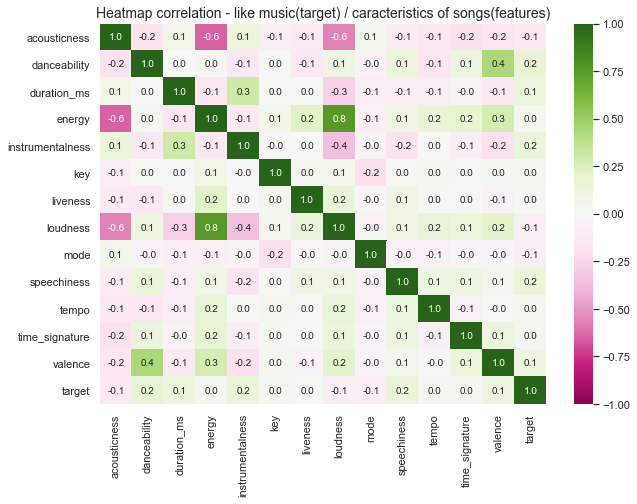

In [105]:
plt.figure(figsize = (10,7))

plt.title("Heatmap correlation - like music(target) / caracteristics of songs(features)", fontsize =14,loc='center')
heatmap_reg = sns.heatmap(df.corr(), cmap="PiYG", robust=True,annot=True,annot_kws={'size':10},fmt=".1f",vmin=-1, vmax=1)
square=True

We don't notice high correlation between our target and the caracteristics of the song.
We notice;
some negative correlation between :
(-0.6) energy and acousticness
(-0.6) loudness/acousticness
positive correlation between (0.8) loudness and energy.

there are multicollinearity between those features.

There are 13 features in the data set.
One target is like (1) or don't like the song (0)

## Visual Analisis

In [19]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df)

## Pairplot

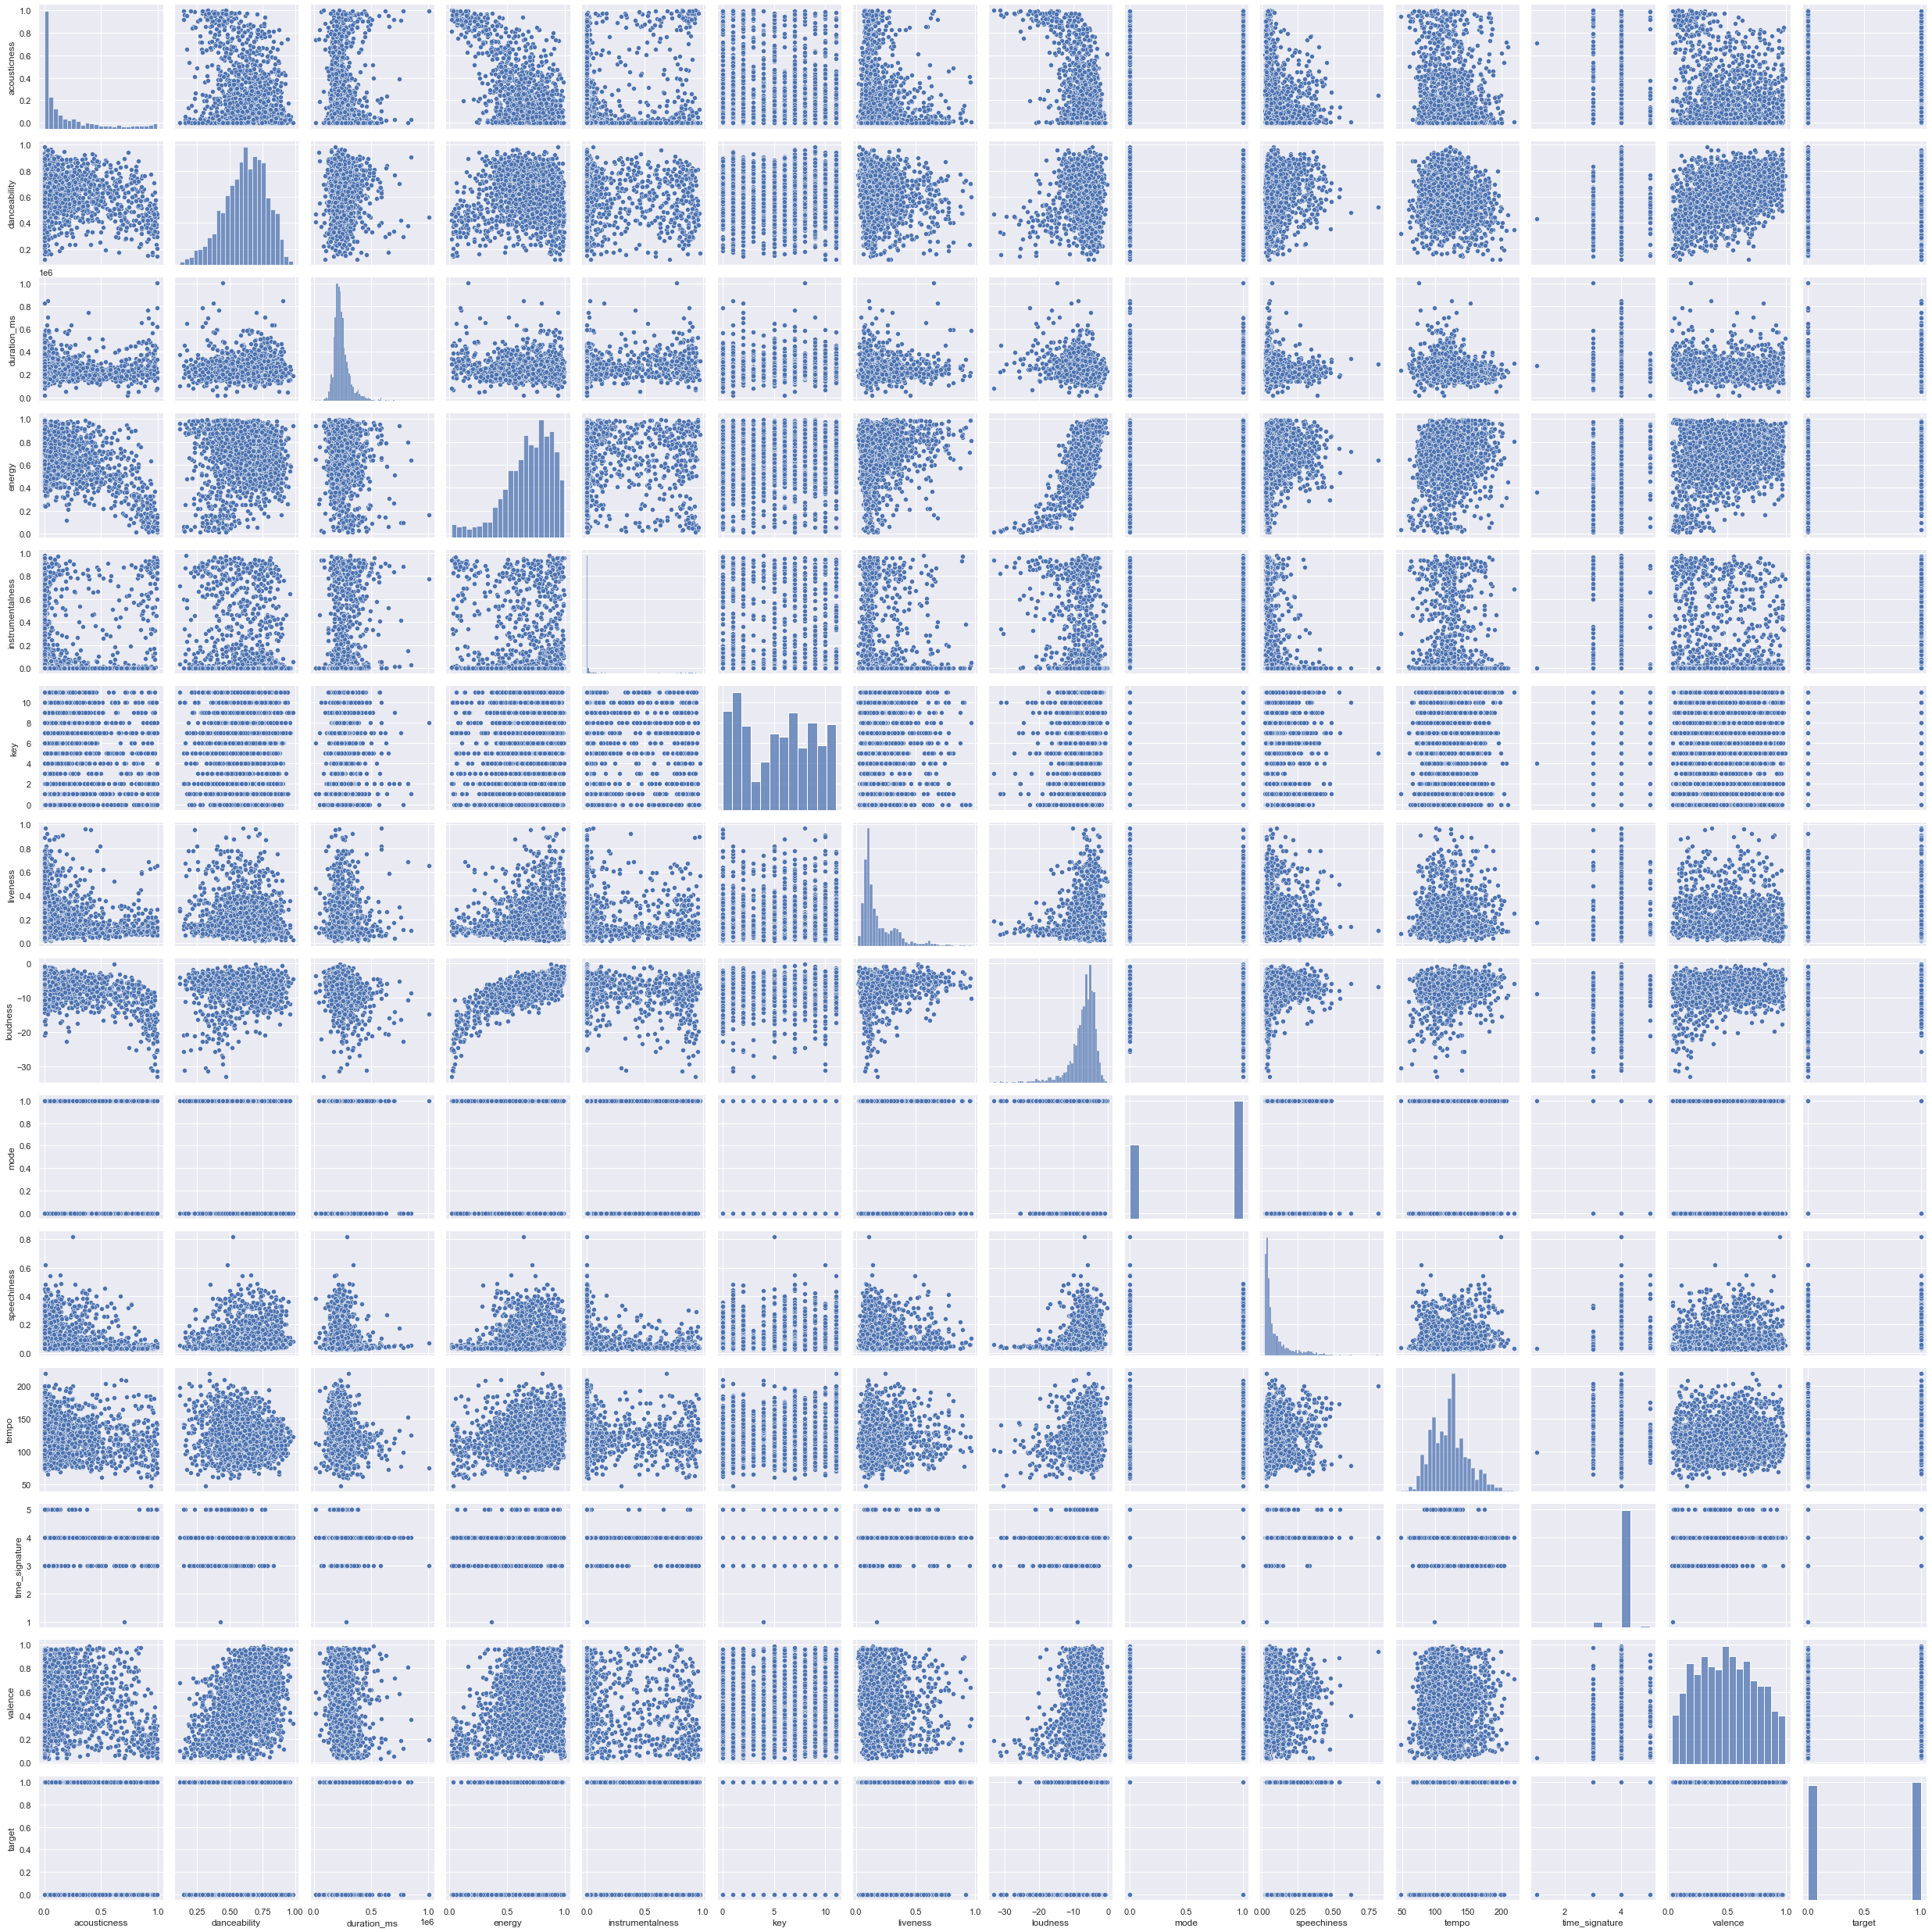

In [127]:
sns.pairplot(df)

## Histogram

<AxesSubplot:>

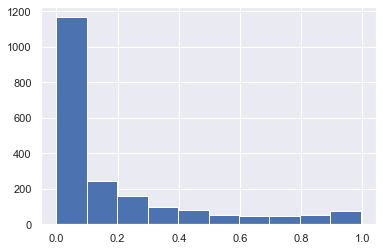

In [109]:
df['acousticness'].hist()

<AxesSubplot:>

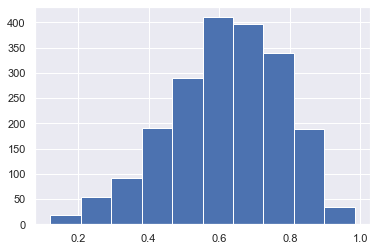

In [110]:
df['danceability'].hist()

<AxesSubplot:>

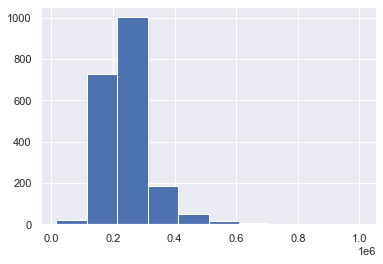

In [111]:
df['duration_ms'].hist()

<AxesSubplot:>

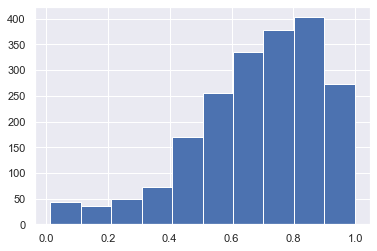

In [112]:
df['energy'].hist()

<AxesSubplot:>

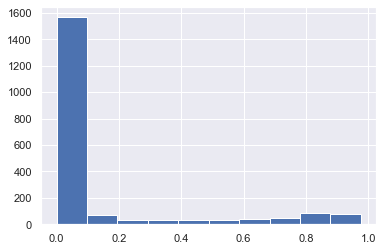

In [113]:
df['instrumentalness'].hist()

<AxesSubplot:>

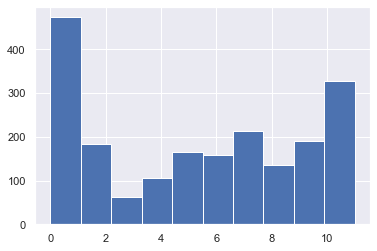

In [114]:
df['key'].hist()

<AxesSubplot:>

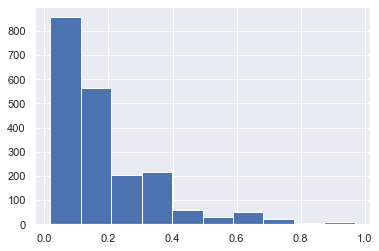

In [115]:
df['liveness'].hist()

<AxesSubplot:>

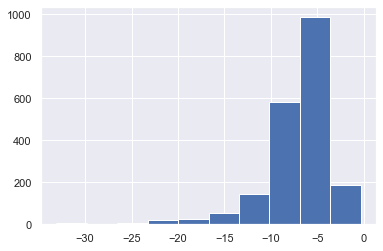

In [116]:
df['loudness'].hist()

<AxesSubplot:>

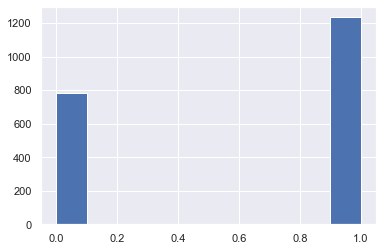

In [117]:
df['mode'].hist()

<AxesSubplot:>

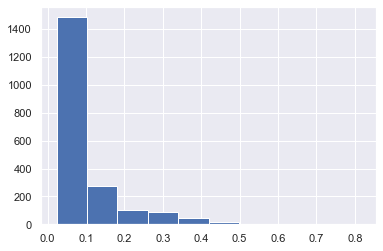

In [118]:
df['speechiness'].hist()

<AxesSubplot:>

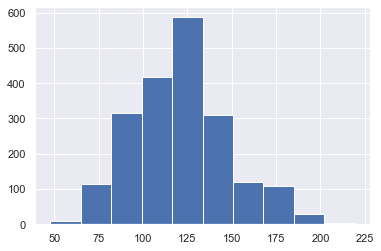

In [119]:
df['tempo'].hist()

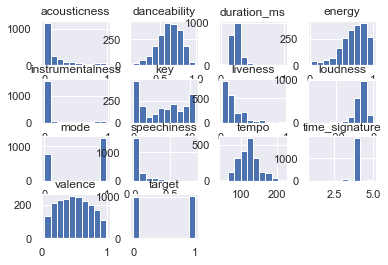

In [120]:
df.hist()
plt.show()

All the features do not more or less look like standard normally distributed data.

## Boxplot

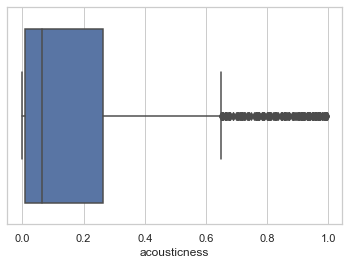

In [156]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["acousticness"])

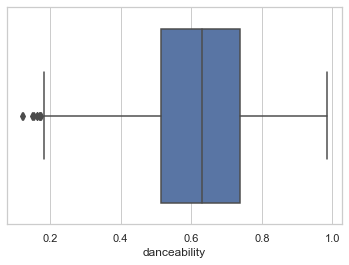

In [157]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["danceability"])

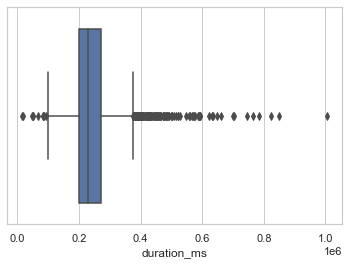

In [158]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["duration_ms"])

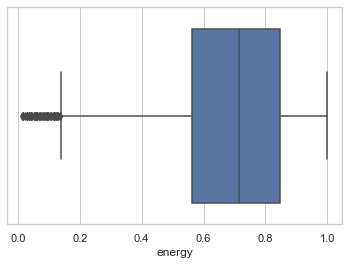

In [159]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["energy"])

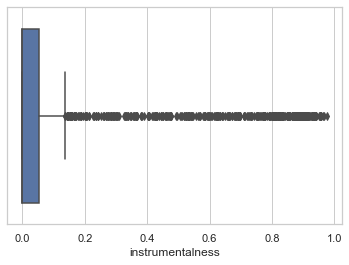

In [160]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["instrumentalness"])

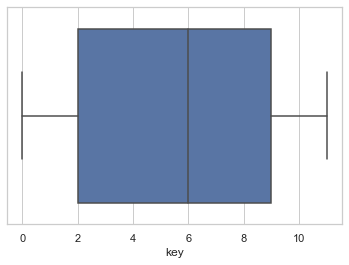

In [161]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["key"])

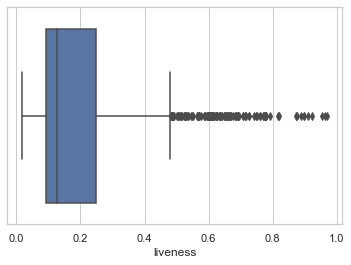

In [162]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["liveness"])

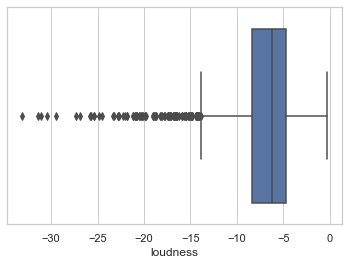

In [163]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["loudness"])

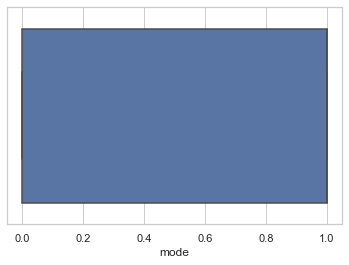

In [164]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["mode"])

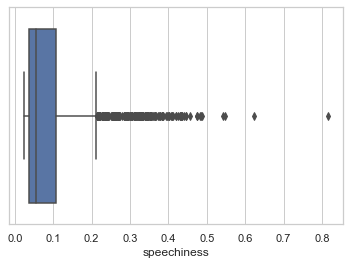

In [165]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["speechiness"])

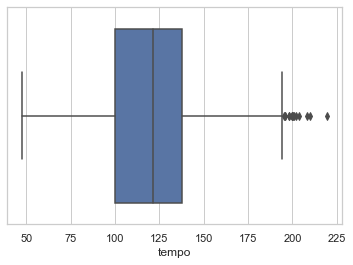

In [166]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["tempo"])

We might think by looking at the boxplots, there are outliers for almost every features in our dataset. In reality, it is about music. And it seems to me quite possible that each song could have its own characteristics. It does not seem relevant to me to see those as outliers and I would be not easy to identify the outliers.

# Modelling

There are only 13 features for the modelling. To begin, I don't use FILTERS, WRAPERS or EMBEDDED methods

## Import scikit learn librairies

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Split the data set one for train and the other for the test

As the values of my features are dispersed, I take a large amount of data to make the prediction : 90% so I leave 10% of the dataset to make the prediction.

In [21]:
X_train, X_test,y_train,y_test = train_test_split(df.drop('target',axis=1), \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

## Decision Tree

In [22]:
model1=DecisionTreeClassifier()

model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)

conf1=confusion_matrix(y_test, y_pred1)#Compute confusion matrix to evaluate the accuracy of a classification.
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)

print('Accuracy', acc1)#% of True positive
print('Recall', rec1)#min False Negative
print('Precision', pre1)#min False Positive
print('F1', f11)# 2*(Precision*Recall/Precision+Recall)

array([[68, 32],
       [29, 73]])

Accuracy 0.698019801980198
Recall 0.7156862745098039
Precision 0.6952380952380952
F1 0.7053140096618358


## Random Forest

For the random forest we need to normalize the values in the columns

In [23]:
model1=RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[82, 18],
       [30, 72]])

Accuracy 0.7623762376237624
Recall 0.7058823529411765
Precision 0.8
F1 0.7500000000000001


## Random Forest balanced

In [24]:
model1=RandomForestClassifier(class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[80, 20],
       [30, 72]])

Accuracy 0.7524752475247525
Recall 0.7058823529411765
Precision 0.782608695652174
F1 0.7422680412371134


## XGBoost

In [25]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[84, 16],
       [32, 70]])

Accuracy 0.7623762376237624
Recall 0.6862745098039216
Precision 0.813953488372093
F1 0.7446808510638299


## AdaBoost

In [26]:
model1=AdaBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[74, 26],
       [29, 73]])

Accuracy 0.7277227722772277
Recall 0.7156862745098039
Precision 0.7373737373737373
F1 0.72636815920398


## CatBoost

In [27]:
model1=CatBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, [eval(i) for i in y_pred1])
acc1=accuracy_score(y_test, [eval(i) for i in y_pred1])
rec1=recall_score(y_test, [eval(i) for i in y_pred1])
pre1=precision_score(y_test, [eval(i) for i in y_pred1])
f11=f1_score(y_test, [eval(i) for i in y_pred1])
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

Learning rate set to 0.013288
0:	learn: 0.6892559	total: 59.8ms	remaining: 59.7s
1:	learn: 0.6856370	total: 65.3ms	remaining: 32.6s
2:	learn: 0.6824485	total: 70ms	remaining: 23.2s
3:	learn: 0.6782847	total: 74.3ms	remaining: 18.5s
4:	learn: 0.6743167	total: 80.2ms	remaining: 16s
5:	learn: 0.6703219	total: 89.4ms	remaining: 14.8s
6:	learn: 0.6661944	total: 98.2ms	remaining: 13.9s
7:	learn: 0.6628036	total: 107ms	remaining: 13.3s
8:	learn: 0.6593437	total: 115ms	remaining: 12.6s
9:	learn: 0.6563868	total: 125ms	remaining: 12.3s
10:	learn: 0.6533243	total: 133ms	remaining: 11.9s
11:	learn: 0.6496453	total: 144ms	remaining: 11.8s
12:	learn: 0.6464522	total: 155ms	remaining: 11.8s
13:	learn: 0.6431615	total: 165ms	remaining: 11.6s
14:	learn: 0.6403264	total: 172ms	remaining: 11.3s
15:	learn: 0.6372620	total: 180ms	remaining: 11s
16:	learn: 0.6343104	total: 187ms	remaining: 10.8s
17:	learn: 0.6316488	total: 196ms	remaining: 10.7s
18:	learn: 0.6293430	total: 203ms	remaining: 10.5s
19:	learn:

176:	learn: 0.4505127	total: 1.34s	remaining: 6.25s
177:	learn: 0.4499231	total: 1.35s	remaining: 6.24s
178:	learn: 0.4495610	total: 1.36s	remaining: 6.22s
179:	learn: 0.4490274	total: 1.36s	remaining: 6.21s
180:	learn: 0.4483611	total: 1.37s	remaining: 6.2s
181:	learn: 0.4479275	total: 1.37s	remaining: 6.18s
182:	learn: 0.4474647	total: 1.38s	remaining: 6.16s
183:	learn: 0.4470607	total: 1.39s	remaining: 6.15s
184:	learn: 0.4465214	total: 1.4s	remaining: 6.15s
185:	learn: 0.4460546	total: 1.4s	remaining: 6.14s
186:	learn: 0.4454121	total: 1.41s	remaining: 6.13s
187:	learn: 0.4449819	total: 1.41s	remaining: 6.11s
188:	learn: 0.4443754	total: 1.42s	remaining: 6.1s
189:	learn: 0.4437096	total: 1.43s	remaining: 6.09s
190:	learn: 0.4432307	total: 1.43s	remaining: 6.06s
191:	learn: 0.4428251	total: 1.44s	remaining: 6.05s
192:	learn: 0.4424014	total: 1.44s	remaining: 6.04s
193:	learn: 0.4419111	total: 1.45s	remaining: 6.04s
194:	learn: 0.4413791	total: 1.46s	remaining: 6.03s
195:	learn: 0.44

356:	learn: 0.3757360	total: 2.49s	remaining: 4.49s
357:	learn: 0.3754153	total: 2.5s	remaining: 4.48s
358:	learn: 0.3751055	total: 2.51s	remaining: 4.47s
359:	learn: 0.3748665	total: 2.51s	remaining: 4.46s
360:	learn: 0.3746653	total: 2.52s	remaining: 4.46s
361:	learn: 0.3743412	total: 2.52s	remaining: 4.45s
362:	learn: 0.3740776	total: 2.53s	remaining: 4.45s
363:	learn: 0.3738135	total: 2.54s	remaining: 4.44s
364:	learn: 0.3733819	total: 2.54s	remaining: 4.43s
365:	learn: 0.3730303	total: 2.55s	remaining: 4.42s
366:	learn: 0.3727867	total: 2.56s	remaining: 4.41s
367:	learn: 0.3725282	total: 2.56s	remaining: 4.4s
368:	learn: 0.3721979	total: 2.57s	remaining: 4.39s
369:	learn: 0.3718094	total: 2.57s	remaining: 4.38s
370:	learn: 0.3713563	total: 2.58s	remaining: 4.37s
371:	learn: 0.3709806	total: 2.58s	remaining: 4.36s
372:	learn: 0.3707825	total: 2.59s	remaining: 4.35s
373:	learn: 0.3704963	total: 2.6s	remaining: 4.34s
374:	learn: 0.3702085	total: 2.6s	remaining: 4.34s
375:	learn: 0.37

529:	learn: 0.3258923	total: 3.64s	remaining: 3.23s
530:	learn: 0.3256403	total: 3.65s	remaining: 3.22s
531:	learn: 0.3252878	total: 3.65s	remaining: 3.21s
532:	learn: 0.3250616	total: 3.66s	remaining: 3.21s
533:	learn: 0.3247061	total: 3.67s	remaining: 3.2s
534:	learn: 0.3245170	total: 3.68s	remaining: 3.19s
535:	learn: 0.3242480	total: 3.69s	remaining: 3.19s
536:	learn: 0.3239025	total: 3.69s	remaining: 3.18s
537:	learn: 0.3237748	total: 3.7s	remaining: 3.17s
538:	learn: 0.3234667	total: 3.7s	remaining: 3.17s
539:	learn: 0.3231777	total: 3.71s	remaining: 3.16s
540:	learn: 0.3228918	total: 3.72s	remaining: 3.15s
541:	learn: 0.3226783	total: 3.72s	remaining: 3.15s
542:	learn: 0.3224785	total: 3.73s	remaining: 3.14s
543:	learn: 0.3221758	total: 3.73s	remaining: 3.13s
544:	learn: 0.3218044	total: 3.74s	remaining: 3.12s
545:	learn: 0.3215674	total: 3.74s	remaining: 3.11s
546:	learn: 0.3212144	total: 3.75s	remaining: 3.1s
547:	learn: 0.3210062	total: 3.75s	remaining: 3.1s
548:	learn: 0.320

700:	learn: 0.2816916	total: 4.78s	remaining: 2.04s
701:	learn: 0.2815786	total: 4.79s	remaining: 2.03s
702:	learn: 0.2813582	total: 4.79s	remaining: 2.02s
703:	learn: 0.2811570	total: 4.8s	remaining: 2.02s
704:	learn: 0.2808793	total: 4.81s	remaining: 2.01s
705:	learn: 0.2806699	total: 4.82s	remaining: 2.01s
706:	learn: 0.2805516	total: 4.83s	remaining: 2s
707:	learn: 0.2803439	total: 4.83s	remaining: 1.99s
708:	learn: 0.2801731	total: 4.84s	remaining: 1.99s
709:	learn: 0.2799949	total: 4.85s	remaining: 1.98s
710:	learn: 0.2796718	total: 4.85s	remaining: 1.97s
711:	learn: 0.2794129	total: 4.86s	remaining: 1.97s
712:	learn: 0.2790958	total: 4.87s	remaining: 1.96s
713:	learn: 0.2788229	total: 4.88s	remaining: 1.95s
714:	learn: 0.2784645	total: 4.89s	remaining: 1.95s
715:	learn: 0.2782494	total: 4.89s	remaining: 1.94s
716:	learn: 0.2779215	total: 4.9s	remaining: 1.94s
717:	learn: 0.2777172	total: 4.91s	remaining: 1.93s
718:	learn: 0.2775011	total: 4.92s	remaining: 1.92s
719:	learn: 0.277

886:	learn: 0.2406146	total: 6.13s	remaining: 780ms
887:	learn: 0.2402594	total: 6.13s	remaining: 774ms
888:	learn: 0.2400829	total: 6.14s	remaining: 767ms
889:	learn: 0.2400024	total: 6.15s	remaining: 760ms
890:	learn: 0.2398180	total: 6.15s	remaining: 753ms
891:	learn: 0.2395318	total: 6.16s	remaining: 746ms
892:	learn: 0.2393504	total: 6.17s	remaining: 739ms
893:	learn: 0.2391952	total: 6.17s	remaining: 732ms
894:	learn: 0.2389811	total: 6.18s	remaining: 725ms
895:	learn: 0.2387535	total: 6.18s	remaining: 718ms
896:	learn: 0.2386221	total: 6.19s	remaining: 711ms
897:	learn: 0.2384211	total: 6.2s	remaining: 704ms
898:	learn: 0.2381444	total: 6.21s	remaining: 698ms
899:	learn: 0.2378579	total: 6.22s	remaining: 691ms
900:	learn: 0.2376857	total: 6.23s	remaining: 684ms
901:	learn: 0.2374484	total: 6.24s	remaining: 678ms
902:	learn: 0.2372921	total: 6.25s	remaining: 671ms
903:	learn: 0.2371165	total: 6.25s	remaining: 664ms
904:	learn: 0.2370587	total: 6.26s	remaining: 657ms
905:	learn: 0

ValueError: source code string cannot contain null bytes

## KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(5)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
display(confusion_matrix(y_pred1, y_test))
display(accuracy_score(y_pred1, y_test))

## LogisticRegression

In [ ]:
# no linear regression in our case

In [ ]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred2=lr.predict(X_test)
display(confusion_matrix(y_pred2, y_test))
display(accuracy_score(y_pred2, y_test))

## SVC

In [ ]:
sv=SVC()
sv.fit(X_train, y_train)
y_pred3=sv.predict(X_test)
display(confusion_matrix(y_pred3, y_test))
display(accuracy_score(y_pred3, y_test))

## Gaussian

In [ ]:
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred4=nb.predict(X_test)
display(confusion_matrix(y_pred4, y_test))
display(accuracy_score(y_pred4, y_test))

In this context, by comparing the accuracy results of each model, it would seem that XGBoost brings us the best true positive rate. In other words, it seems that it is able to offer us with a 76% success rate a song that the user will like knowing the features of a song.

# PCA

PCA is used to reduce the superfluous complexity of the dataset (reduce the dimensions, reducing number of features) in order to speed up the learning of the machine.

## import librairy

In [28]:
from sklearn.decomposition import PCA

## n_components

In [29]:
X1=df.drop('target',axis=1)

In [30]:
X1.shape

(2017, 13)

In [31]:
modelpca=PCA(n_components=1)#we are looking the value of n_components to apply in the PCA

In [32]:
Xpca_reduced=modelpca.fit_transform(X1)

In [33]:
np.cumsum(modelpca.explained_variance_ratio_)# return the cumulative sum of the variance a given axis.

array([0.99999989])

keeping 1 in n_component (built thanks to the other features), the variance is 99%.

## Model PCA

In [43]:
modelpca=PCA(n_components=2)#at least 2 even 1 is enough here
Xpca_reduced=modelpca.fit_transform(X1)

## XGB with PCA

In [44]:
X_train, X_test,y_train,y_test = train_test_split(Xpca_reduced, \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

In [45]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[63, 37],
       [40, 62]])

Accuracy 0.6188118811881188
Recall 0.6078431372549019
Precision 0.6262626262626263
F1 0.6169154228855721


The accuracy using only XGB is around 76%
The accuracy using XGB with PCA is around 59%

By using the XGB algorithm, the number of songs offered to the user that he will like will be higher than in the case of the XGB PCA model.
On the other hand, the processing of the algorithm in the last case will be faster, and probably also less expensive.

My assumption is:
En tant qu'utilisateur, je préférerai la recommandation de chansons à partir d'un algorithme XGB. En tant que société, dans ce cas, Spotify, je préférerai le modèle XGB et PCA.


# Preprocessing

This is probably the step I should have started with

During the manipulating step, we notice that some of features could be scaled like Tempo, duration, time-signature and key.

For scaled those feature, we are going to use the standarscaler. This preprocessing is sensitive to the outliers. 

Xscaled=(X-muX)/sigmaX (muX is the initial mean of X, sigmaX is the standard deviation of X)

## import library

In [46]:
from sklearn.preprocessing import StandardScaler

## pre-processing with StandardScaller

In [47]:
Xall=df.drop('target',axis=1)
Xall

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623


In [48]:
scaller=StandardScaler()

In [49]:
Featpp = scaller.fit_transform(Xall)#prepro with all the features

## StandardScaller all the features and XGB

In [41]:
X_train, X_test,y_train,y_test = train_test_split(Featpp, \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

In [42]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[84, 16],
       [32, 70]])

Accuracy 0.7623762376237624
Recall 0.6862745098039216
Precision 0.813953488372093
F1 0.7446808510638299


The accuracy using only XGB is around 76% The accuracy using XGB with StandardScalling is always 76%